# Project of Fundamentals of Artificial Intelligence and Knowledge Representation year 2022/2023

Made by Riccardo Murgia and Alessio Pellegrino
data source: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link?resource=download

# Imports

In [1]:
import seaborn as sns
import random

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from pgmpy.estimators import HillClimbSearch

from function_definition import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = 42

# Data import and visualization


In [2]:
data = pd.read_csv('./dataset/cancer patient data sets.csv', index_col='index')
data.drop('Patient Id', axis=1, inplace=True)
target = 'Level'

data[target] = OrdinalEncoder(categories=[['Low', 'Medium', 'High']]).fit_transform(data[['Level']])
data.head()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0.0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1.0
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2.0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2.0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2.0


## Analyzing the data


In [3]:
data.describe()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


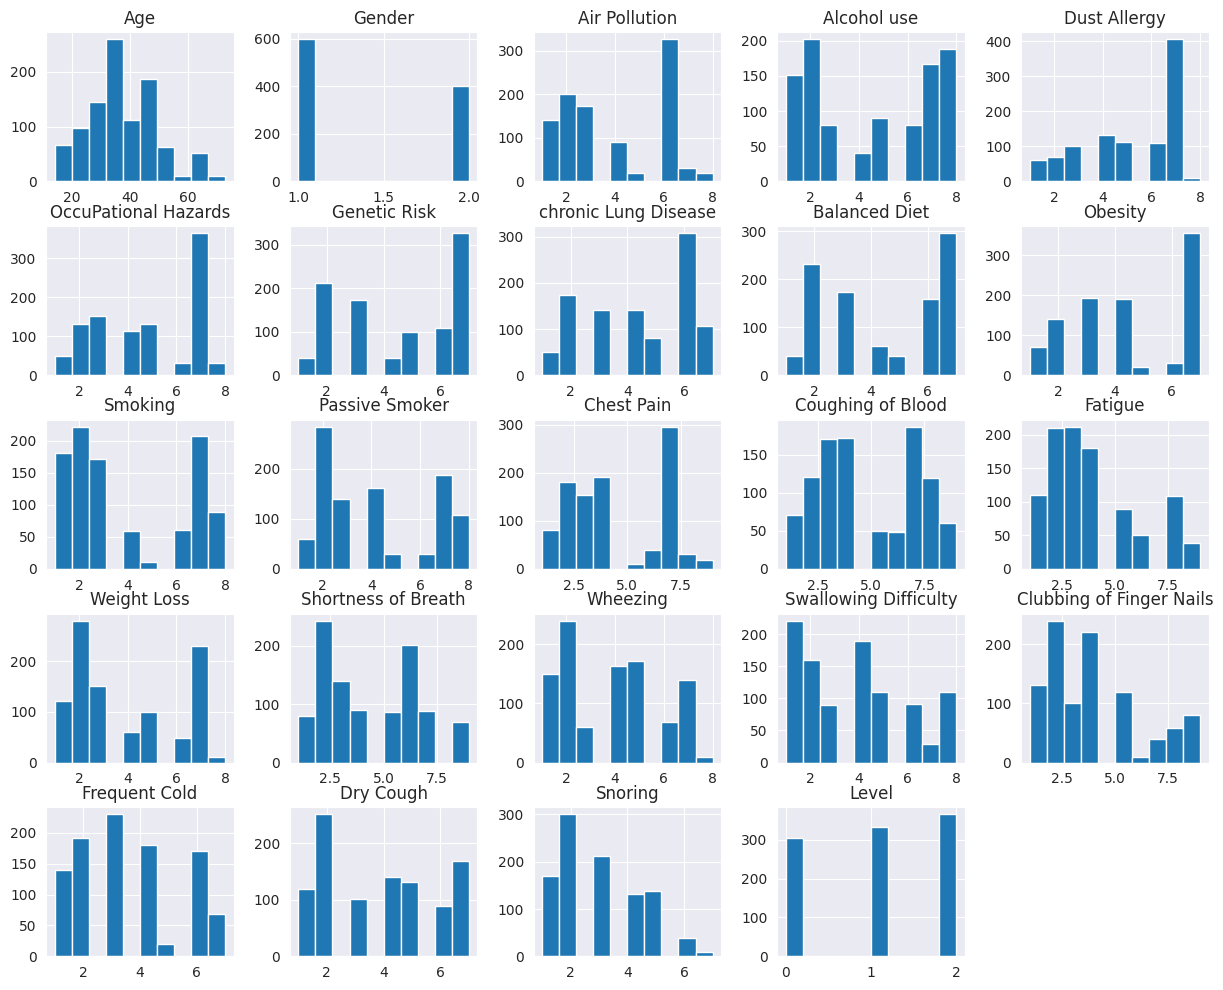

In [4]:
data.hist(figsize=(15,12));


## Checking for NaN values


In [4]:
np.sum(pd.isnull(data), 0)


Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

## Let's discretize the values of the age attribute

Below we can see the new categories and the associated meaning:
* 0: Child
* 1: Young adult
* 2: Adult
* 3: Senior

In [5]:
columns = ['Age']
bins_edges = {'Age':[0, 18, 30, 60, 100]}
categories = {'Age':[0, 1, 2, 3]}
data = discretize(data, columns, bins_edges, categories=categories)


## Let’s take a look to the correlation of the data


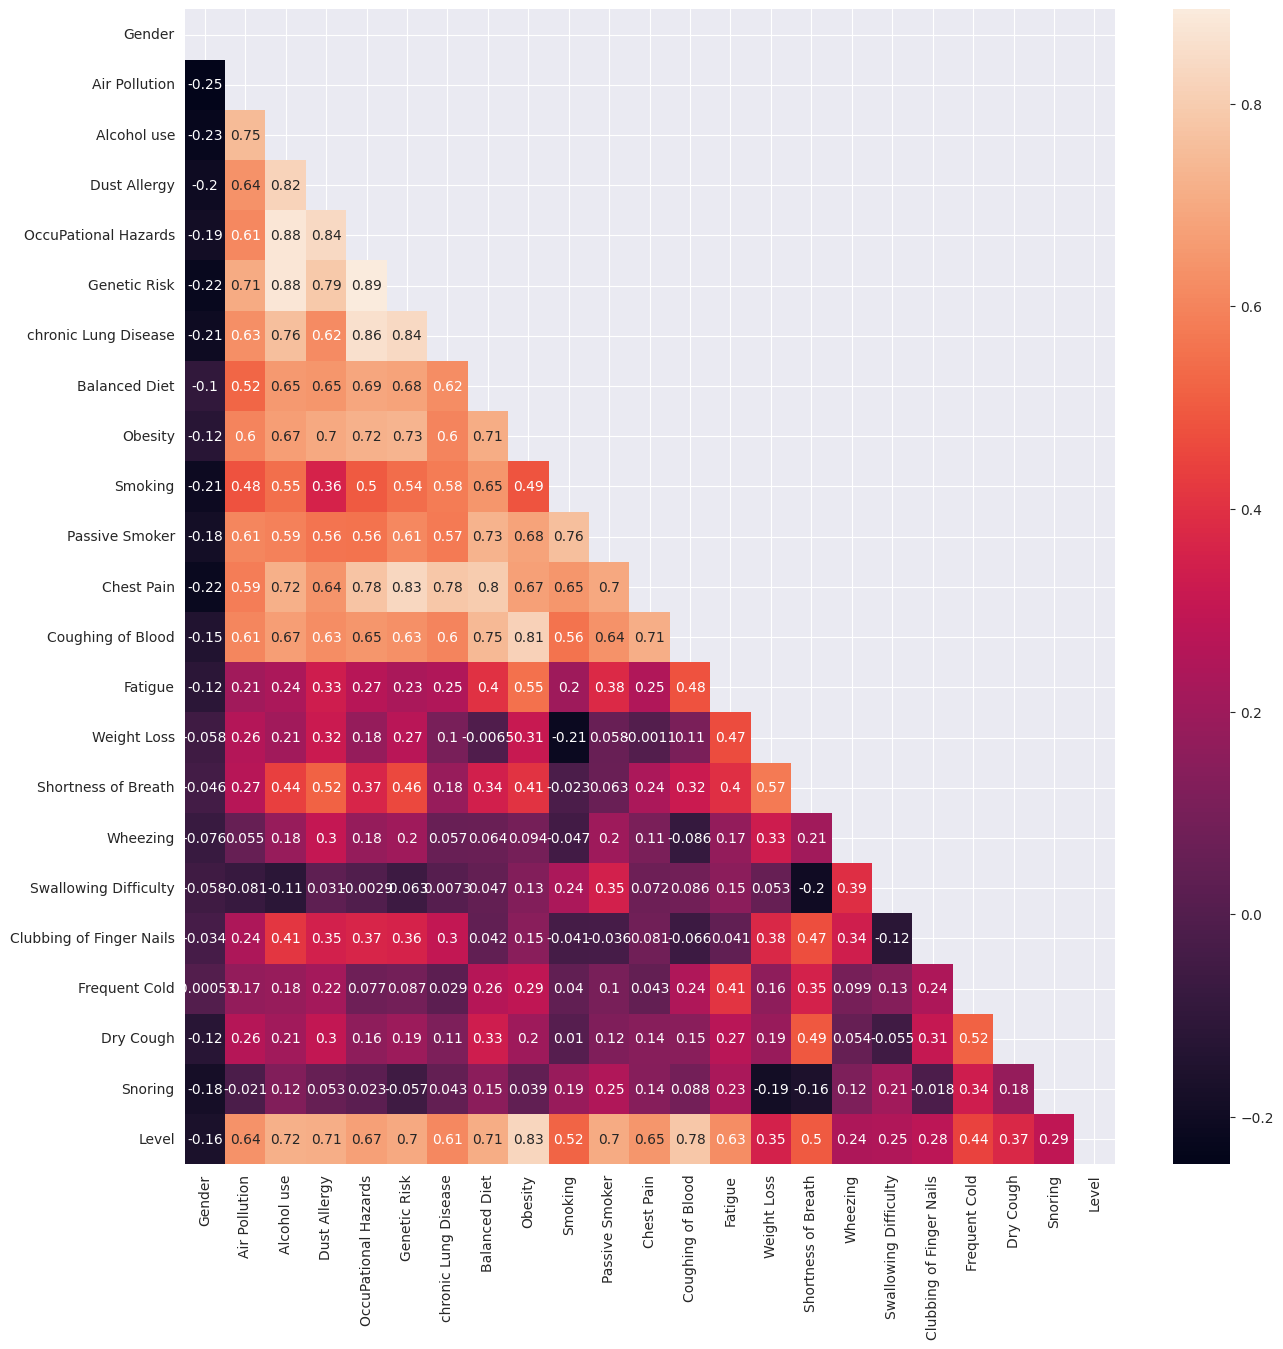

In [6]:
plt.figure(figsize=(15,15))
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True, mask=mask);


# Classification Experiments


#### Let's prepare the data

In [6]:
data.columns = [mp(node) for node in data.columns.values]
target = target.lower()

data_train, data_test = train_test_split(data, random_state=random_state, train_size=0.80)
data_test.reset_index(drop=True, inplace=True)
data_train.reset_index(drop=True, inplace=True)

X_train, y_train = data_train.drop(target, axis=1), data_train[target].values.tolist()
X_test, y_test = data_test.drop(target, axis=1), data_test[target].values.tolist()


## Let's define our models

### First net

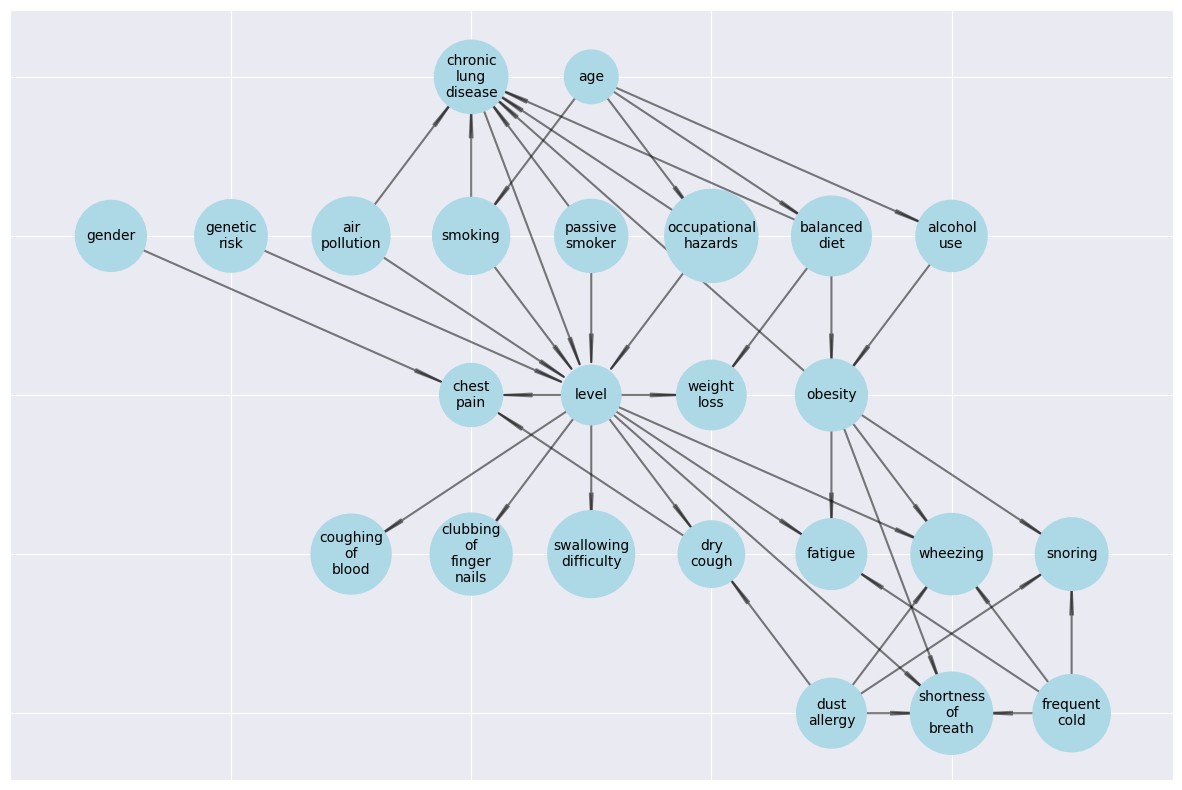

In [7]:
full_nodes_set = [
    'Chronic lung disease', 'Age', 'Gender', 'Genetic risk', 'Air pollution', 'Smoking', 'Passive smoker', 'Occupational Hazards', 'Balanced diet',
    'Alcohol use', 'Chest pain', 'Level', 'Weight loss', 'Obesity', 'Coughing of blood', 'Clubbing of finger nails', 'Swallowing difficulty',
    'Dry cough', 'Fatigue', 'Wheezing', 'Snoring', 'Dust allergy', 'Shortness of breath', 'Frequent cold'
    ]

full_nodes_set = [mp(node) for node in full_nodes_set]

arcs_full_net = [
    ('age', 'smoking'), ('age', 'occupational hazards'), ('age', 'balanced diet'), ('age', 'alcohol use'),
    ('air pollution', 'level'),  ('chronic lung disease', 'level'), ('smoking', 'level'), ('passive smoker', 'level'), ('occupational hazards', 'level'),
    ('genetic risk', 'level'),
    ('level', 'chest pain'), ('level', 'dry cough'), ('level', 'clubbing of finger nails'), ('level', 'coughing of blood'), ('level', 'swallowing difficulty'),
    ('level', 'fatigue'), ('level', 'wheezing'), ('level', 'shortness of breath'), ('level', 'weight loss'),
    ('air pollution', 'chronic lung disease'), ('smoking', 'chronic lung disease'), ('passive smoker', 'chronic lung disease'),
    ('balanced diet', 'chronic lung disease'),
    ('obesity', 'chronic lung disease'),
    ('occupational hazards', 'chronic lung disease'),
    ('balanced diet', 'weight loss'), ('balanced diet', 'obesity'),
    ('alcohol use' , 'obesity'),
    ('gender', 'chest pain' ), ('dry cough', 'chest pain'),
    ('obesity', 'fatigue'), ('obesity', 'wheezing'), ('obesity', 'shortness of breath'), ('obesity', 'snoring'),
    ('dust allergy', 'dry cough'), ('dust allergy', 'wheezing'), ('dust allergy', 'snoring'), ('dust allergy', 'shortness of breath'),
    ('frequent cold', 'wheezing'), ('frequent cold', 'snoring'), ('frequent cold', 'shortness of breath'), ('frequent cold', 'fatigue')
    ]

arcs_full_net = [(mp(t[0]), mp(t[1])) for t in arcs_full_net]

full_bn_model = BayesianNetwork(arcs_full_net)
draw_net(full_nodes_set, full_bn_model)

### Second net


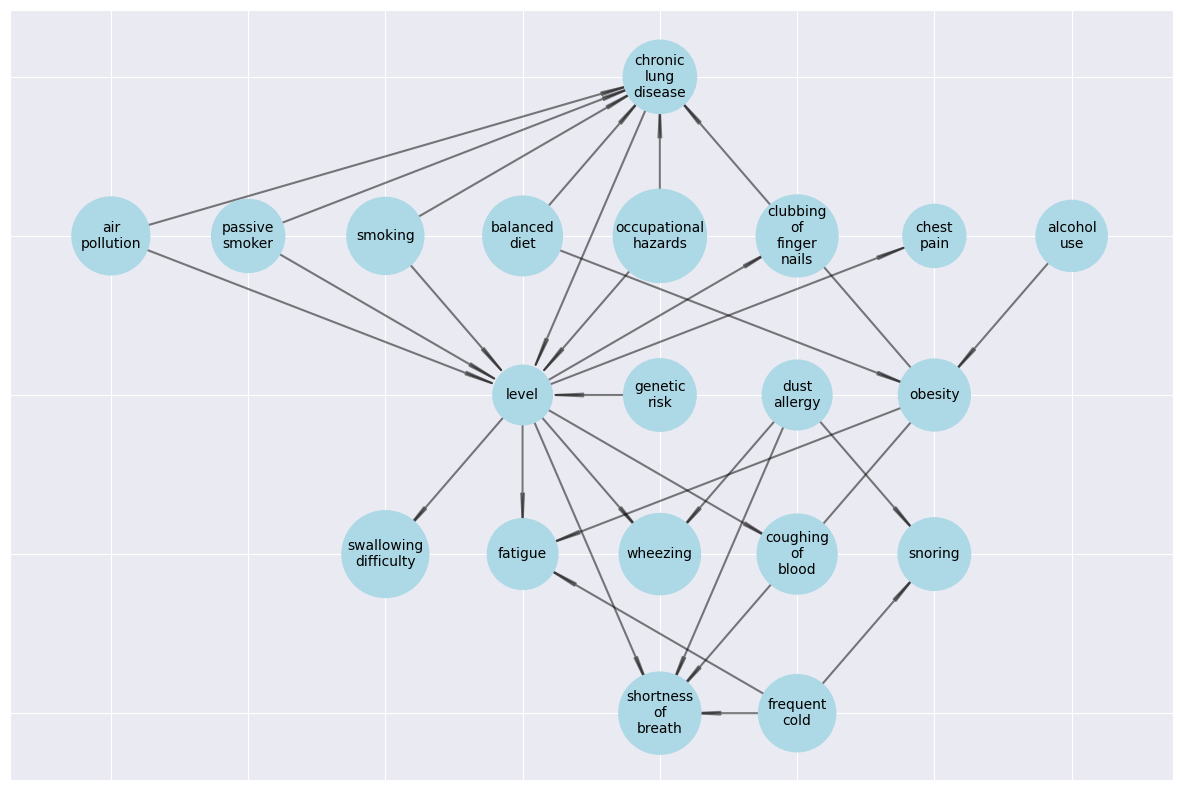

In [8]:
trimmed_nodes = [
    'chronic lung disease',  'air pollution', 'passive smoker', 'smoking',
    'balanced diet', 'occupational hazards', 'clubbing of finger nails', 'chest pain', 'alcohol use', 'level', 'genetic risk', 'dust allergy', 'obesity', 'swallowing difficulty',
    'fatigue', 'wheezing', 'coughing of blood', 'snoring','shortness of breath','frequent cold'
    ]

trimmed_nodes = [mp(node) for node in trimmed_nodes]

arcs_trimmed_net = [
    ('air pollution', 'level'),  ('chronic lung disease', 'level'), ('smoking', 'level'), ('passive smoker', 'level'), ('occupational hazards', 'level'),
    ('genetic risk', 'level'),
    ('level', 'clubbing of finger nails'), ('level', 'chest pain'), ('level', 'coughing of blood'), ('level', 'swallowing difficulty'), ('level', 'fatigue'),
    ('level', 'wheezing'), ('level', 'shortness of breath'),
    ('air pollution', 'chronic lung disease'), ('smoking', 'chronic lung disease'), ('passive smoker', 'chronic lung disease'),
    ('occupational hazards', 'chronic lung disease'), ('balanced diet', 'chronic lung disease'), ('obesity', 'chronic lung disease'),
    ('balanced diet', 'obesity'), ('alcohol use' , 'obesity'),
    ('obesity', 'fatigue'), ('obesity', 'shortness of breath'),
    ('dust allergy', 'wheezing'), ('dust allergy', 'snoring'), ('dust allergy', 'shortness of breath'),
    ('frequent cold', 'snoring'), ('frequent cold', 'shortness of breath'), ('frequent cold', 'fatigue')
    ]


arcs_trimmed_net = [(mp(t[0]), mp(t[1])) for t in arcs_trimmed_net]

trimmed_bn_model = BayesianNetwork(arcs_trimmed_net)
draw_net(trimmed_nodes, trimmed_bn_model, style='trimmed')


### Third net

  0%|          | 0/1000000 [00:00<?, ?it/s]

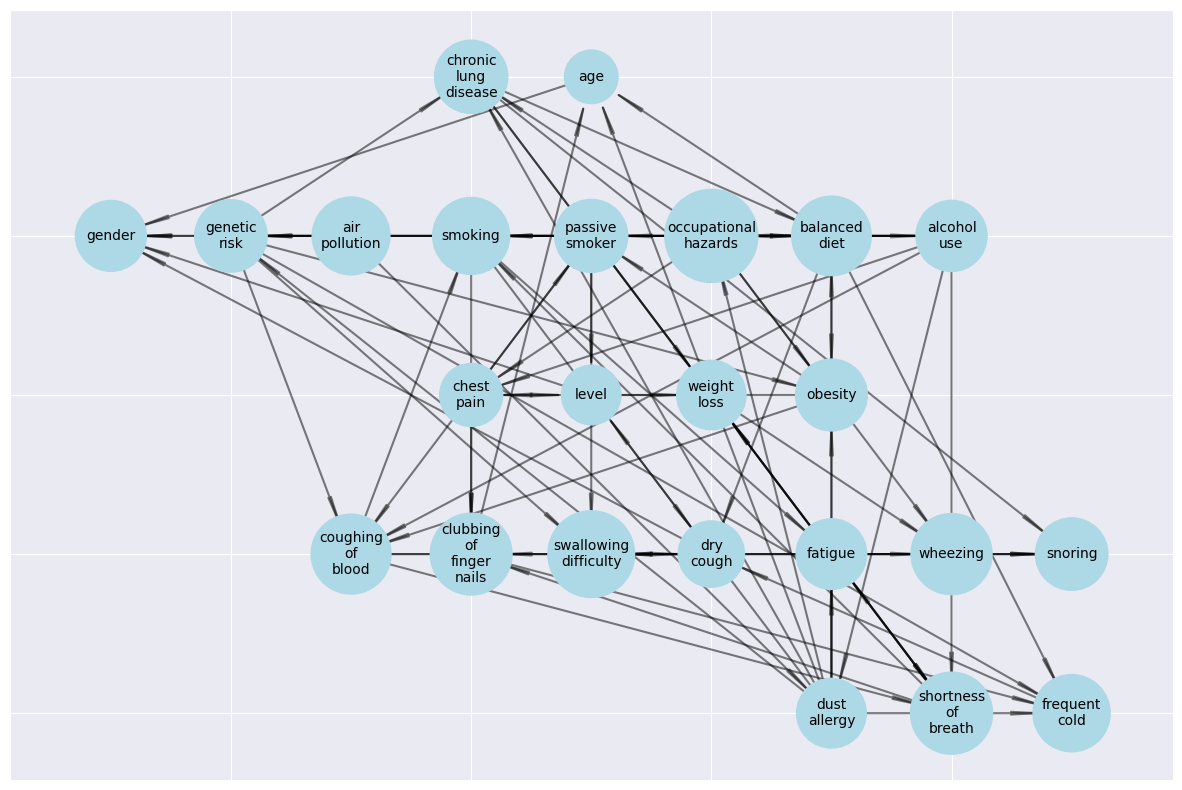

In [9]:
auto_bn_model = BayesianNetwork(HillClimbSearch(data=data_train).estimate())
draw_net(full_nodes_set, auto_bn_model)


## Let's fit our models

In [10]:
fit(full_bn_model, data_train)
fit(trimmed_bn_model, data_train[trimmed_nodes])
fit(auto_bn_model, data_train)


## Check the consistency of the models

In [11]:
models_to_check = {'Full net': full_bn_model, 'Trimmed net': trimmed_bn_model, 'Auto net':auto_bn_model}
check_consistency(models_to_check)


Full net consistency check successfully completed
Trimmed net consistency check successfully completed
Auto net consistency check successfully completed


## Let's see our model outcomes

In [12]:
y_predicted_full = classify(full_bn_model, X_test)
report = metrics.classification_report(y_test, y_predicted_full)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [13]:
trimmed_nodes_X = trimmed_nodes.copy()
trimmed_nodes_X.remove(target)
y_predicted_trimmed = classify(trimmed_bn_model, X_test[trimmed_nodes_X])
report = metrics.classification_report(y_test, y_predicted_trimmed)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [14]:
y_predicted_auto = classify(auto_bn_model, X_test)
report = metrics.classification_report(y_test, y_predicted_auto)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Let's analyse the probability tables obtained from our models

In [16]:
n_sample_test = len(y_test)
random_element_index = random.randrange(n_sample_test)
element_to_test = X_test.loc[random_element_index].to_frame().T


full_model_probability = full_bn_model.predict_probability(element_to_test).to_dict()
trimmed_model_probability = trimmed_bn_model.predict_probability(element_to_test[trimmed_nodes_X]).to_dict()
auto_model_probability = auto_bn_model.predict_probability(element_to_test).to_dict()

probabilities = [full_model_probability, trimmed_model_probability, auto_model_probability]

for probability, model_name in zip(probabilities, ['full', 'trimmed', 'auto']):
    for key in probability.keys():
        probability[key] = list(probability[key].values())[0]

    probability['model'] = model_name

print(f'probability predicted for index {random_element_index}:')
pd.DataFrame(probabilities).set_index('model').head()

probability predicted for index 47:


,level_0.0,level_1.0,level_2.0
model,,,
full,1.695368e-07,1.000000,3.845184e-11
trimmed,1.393905e-05,0.999986,3.522632e-09
auto,1.260430e-03,0.995588,3.151074e-03


### Markov blanket Test

In [17]:
mb_full_bn = full_bn_model.get_markov_blanket('level')
mb_trimmed_bn = trimmed_bn_model.get_markov_blanket('level')
mb_auto_bn = auto_bn_model.get_markov_blanket('level')

mb_full_bn_and_level = mb_full_bn + ['level']
mb_trimmed_and_bn_level = mb_trimmed_bn + ['level']
mb_auto_bn_ans_level = mb_auto_bn + ['level']


In [18]:
get_trimmed_shape([data_train, data_test], [mb_full_bn, mb_full_bn_and_level], ['Markov Blanket','Markov Blanket + level'], ['train', 'test']).head(2)


,Markov Blanket,Markov Blanket + level
idx,,
train,"rows = 81, columns = 20","rows = 81, columns = 21"
test,"rows = 60, columns = 20","rows = 60, columns = 21"


In [19]:
get_trimmed_shape([data_train, data_test], [mb_trimmed_bn, mb_trimmed_and_bn_level], ['Markov Blanket','Markov Blanket + level'], ['train', 'test']).head(2)


,Markov Blanket,Markov Blanket + level
idx,,
train,"rows = 53, columns = 16","rows = 53, columns = 17"
test,"rows = 45, columns = 16","rows = 45, columns = 17"


In [20]:
get_trimmed_shape([data_train, data_test], [mb_auto_bn, mb_auto_bn_ans_level], ['Markov Blanket','Markov Blanket + level'], ['train', 'test']).head(2)


,Markov Blanket,Markov Blanket + level
idx,,
train,"rows = 104, columns = 12","rows = 104, columns = 13"
test,"rows = 70, columns = 12","rows = 70, columns = 13"


# Query experiments

In [21]:
full_bn_inference = VariableElimination(full_bn_model)
trimmed_bn_inference  = VariableElimination(trimmed_bn_model)
auto_bn_inference = VariableElimination(auto_bn_model)


## First query

This Interrogation carried out on the three models seeks to understand how different causes may influence the state of disease progression.

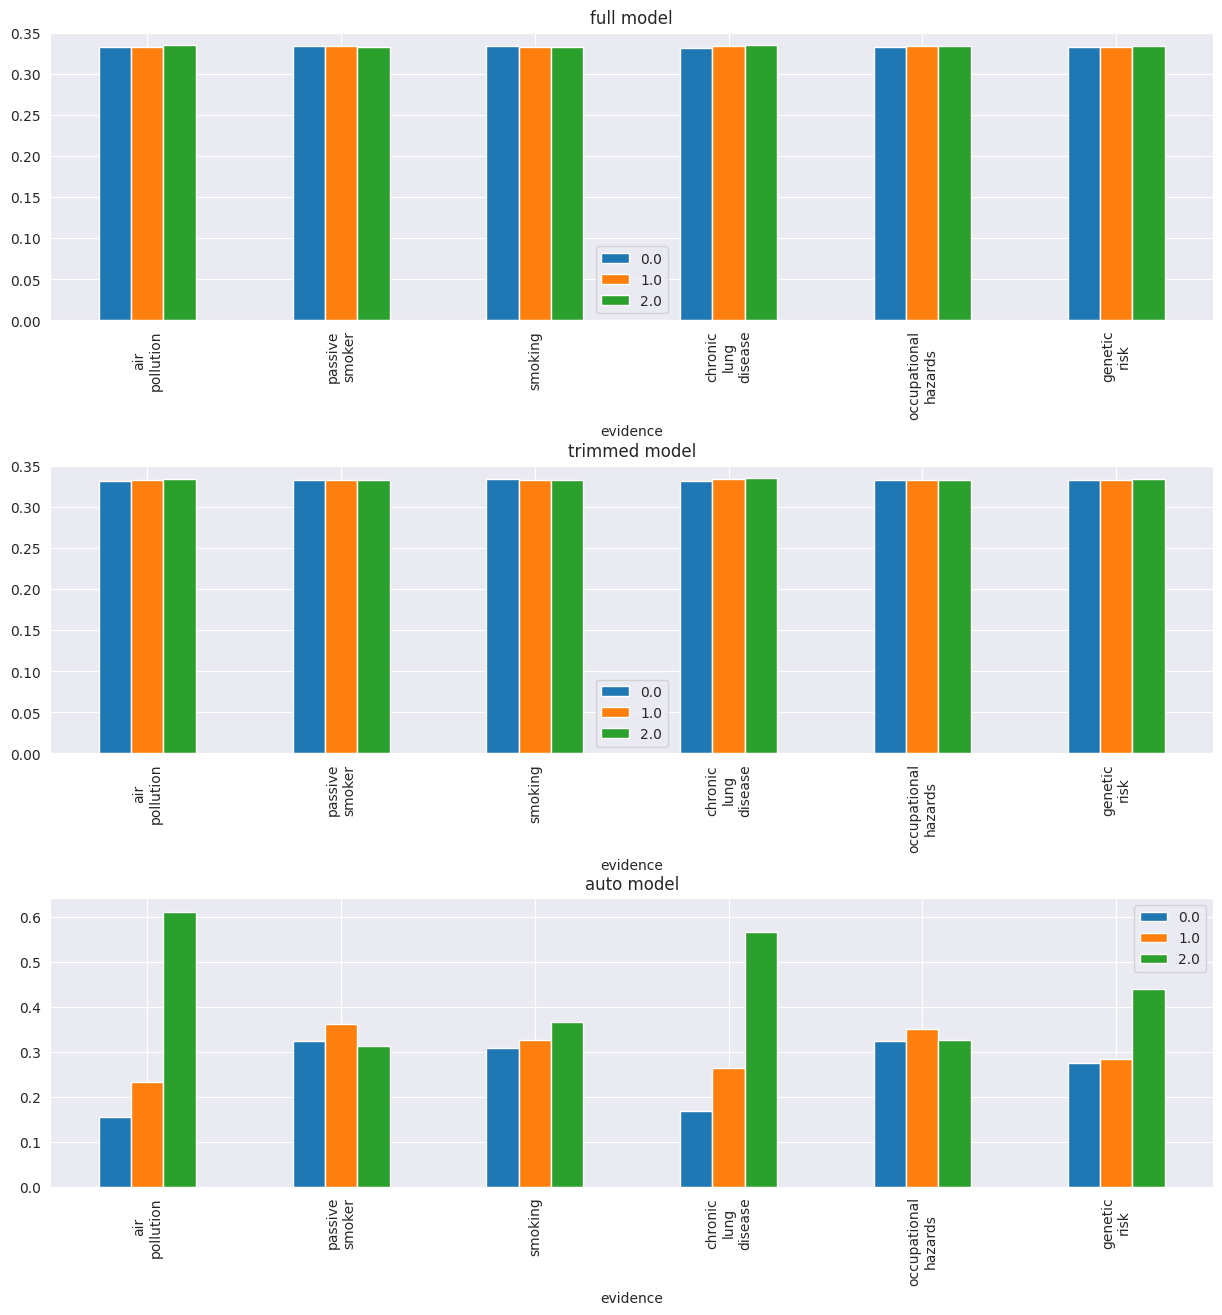

In [25]:
evidences = [{mp('air pollution'):6}, {mp('passive smoker'):6}, {mp('smoking'):6}, {mp('chronic lung disease'):6}, {mp('occupational hazards'):6}, {mp('genetic risk'):6}]
query = ['level']

query_result = make_queries([full_bn_inference, trimmed_bn_inference, auto_bn_inference], ['full model', 'trimmed model', 'auto model'], evidences, query)
multi_bar_plot(query_result.values(), query_result.keys(), 'evidence', .5)


In [23]:
dfs = dict_to_dataframes(query_result)
show_details(dfs)


Evidences: air pollution


,0.0,1.0,2.0
model,,,
full model,0.332127,0.333203,0.334670
trimmed model,0.332150,0.333214,0.334636
auto model,0.154778,0.233048,0.612174


Evidences: passive smoker


,0.0,1.0,2.0
model,,,
full model,0.333360,0.333327,0.333314
trimmed model,0.333357,0.333328,0.333316
auto model,0.325082,0.360953,0.313965


Evidences: smoking


,0.0,1.0,2.0
model,,,
full model,0.333457,0.333260,0.333284
trimmed model,0.333465,0.333254,0.333281
auto model,0.307441,0.327179,0.365380


Evidences: chronic lung disease


,0.0,1.0,2.0
model,,,
full model,0.331425,0.333855,0.334719
trimmed model,0.331465,0.333857,0.334678
auto model,0.169284,0.264601,0.566115


Evidences: occupational hazards


,0.0,1.0,2.0
model,,,
full model,0.333299,0.333332,0.333369
trimmed model,0.333301,0.333309,0.333389
auto model,0.324280,0.350135,0.325585


Evidences: genetic risk


,0.0,1.0,2.0
model,,,
full model,0.333071,0.332953,0.333976
trimmed model,0.333075,0.332961,0.333964
auto model,0.276020,0.284734,0.439246


## Second query

This interrogation performed on the three models seeks to understand how much a given symptom associated with lung cancer may be due to other diseases

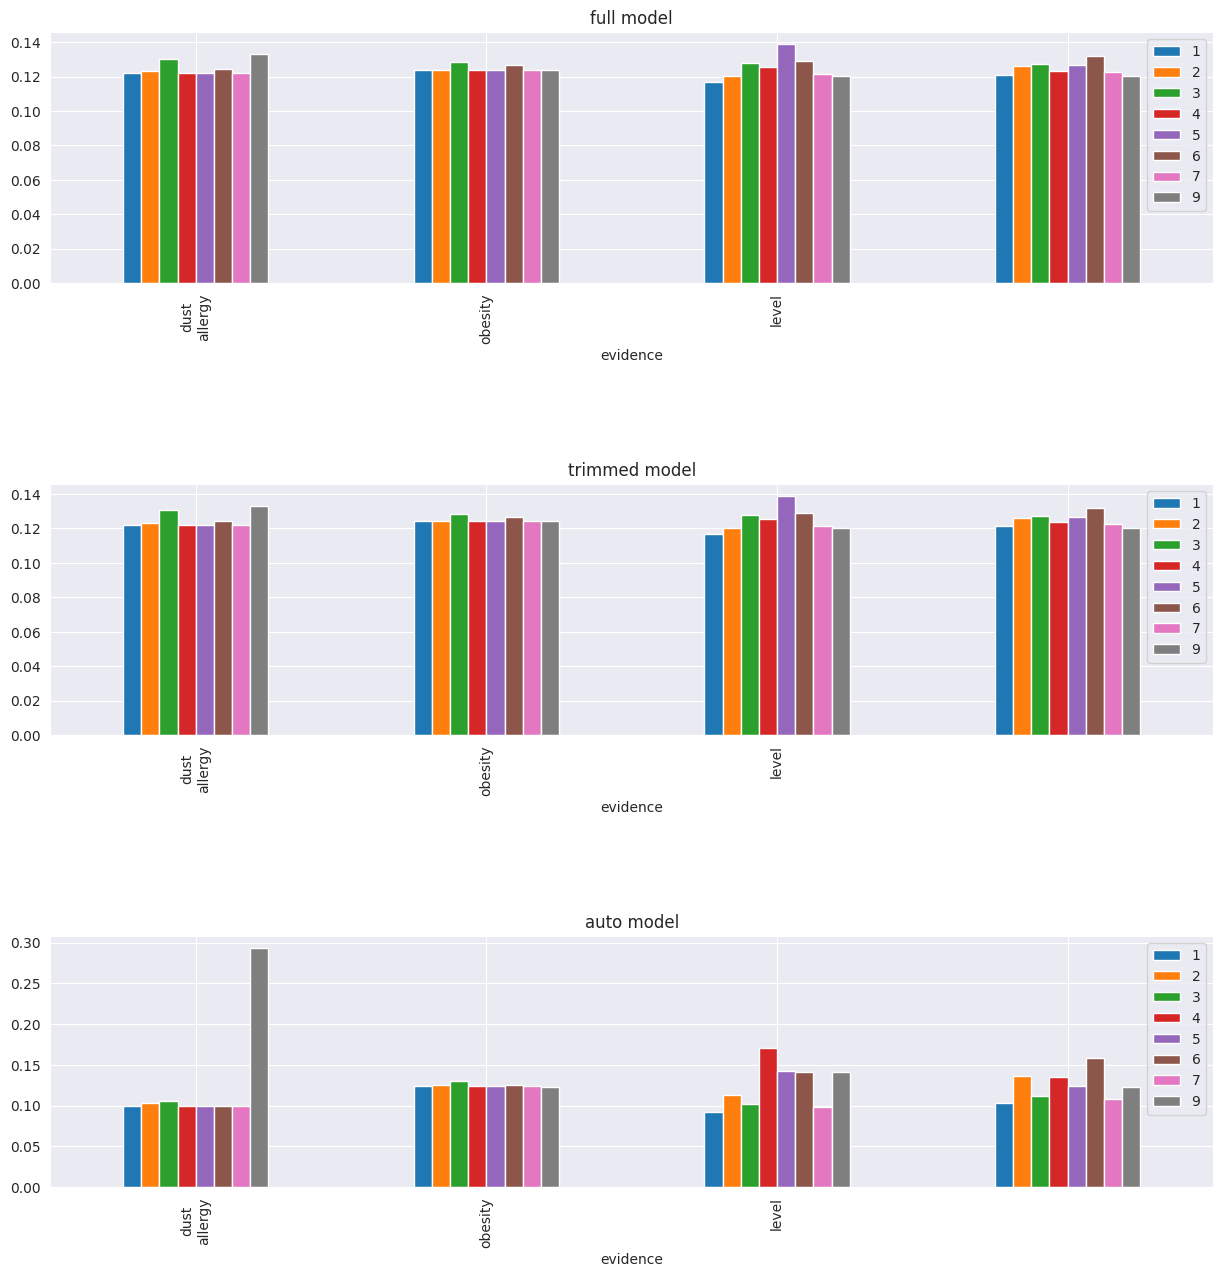

In [27]:
evidences = [{mp('dust allergy'):6},
             {'obesity': 5},
             {'level': 2},
             {}]
query = [mp('shortness of breath')]

query_result = make_queries([full_bn_inference, trimmed_bn_inference, auto_bn_inference], ['full model', 'trimmed model', 'auto model'], evidences, query)
multi_bar_plot(query_result.values(), query_result.keys(), 'evidence', .8)


In [28]:
dfs = dict_to_dataframes(query_result)
show_details(dfs)


Evidences: dust allergy


,1,2,3,4,5,6,7,9
model,,,,,,,,
full model,0.122218,0.123298,0.130462,0.122218,0.122218,0.124419,0.122218,0.132949
trimmed model,0.122217,0.123304,0.130495,0.122217,0.122217,0.124444,0.122217,0.132891
auto model,0.099482,0.103017,0.106077,0.099398,0.099228,0.100067,0.099350,0.293380


Evidences: obesity


,1,2,3,4,5,6,7,9
model,,,,,,,,
full model,0.124104,0.124104,0.128488,0.124104,0.124104,0.126885,0.124104,0.124104
trimmed model,0.124104,0.124104,0.128488,0.124104,0.124104,0.126885,0.124104,0.124104
auto model,0.124568,0.125863,0.130774,0.123614,0.123481,0.124981,0.123693,0.123025


Evidences: level


,1,2,3,4,5,6,7,9
model,,,,,,,,
full model,0.116748,0.120243,0.127741,0.125316,0.138934,0.129087,0.121482,0.120450
trimmed model,0.116794,0.120271,0.127730,0.125325,0.138821,0.129069,0.121514,0.120477
auto model,0.092319,0.112488,0.102098,0.170592,0.142414,0.140674,0.098237,0.141179


Evidences: 


,1,2,3,4,5,6,7,9
model,,,,,,,,
full model,0.121209,0.126141,0.127350,0.123493,0.126862,0.132032,0.122510,0.120402
trimmed model,0.121235,0.126144,0.127353,0.123492,0.126826,0.132009,0.122525,0.120417
auto model,0.103658,0.136635,0.112173,0.134977,0.123570,0.158492,0.108079,0.122416


## Third query

The interrogation conducted on our three models seeks to understand how the addition of a particular symptom can lead to a higher state of advancement.

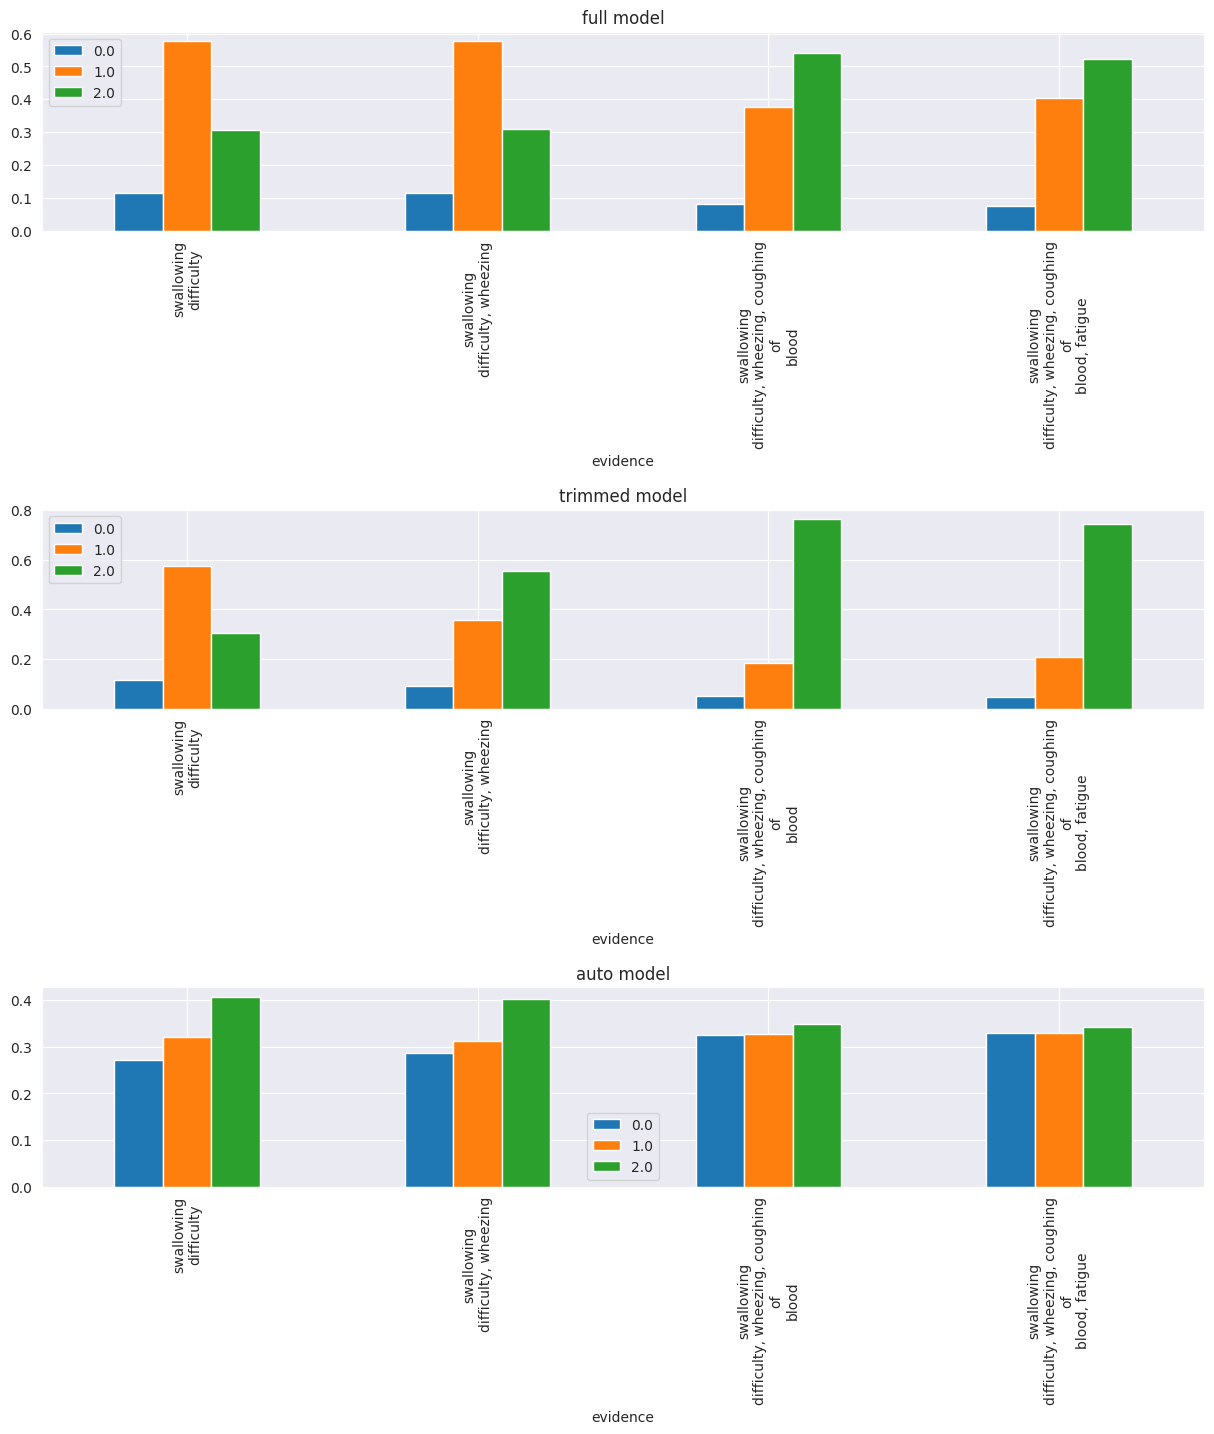

In [26]:
evidences = [{mp('swallowing difficulty'): 6},
             {mp('swallowing difficulty'): 6, mp('wheezing'): 6},
             {mp('swallowing difficulty'): 6, mp('wheezing'): 6, mp('coughing of blood'):6},
             {mp('swallowing difficulty'): 6, mp('wheezing'): 6, mp('coughing of blood'):6, mp('fatigue'):6},
             ]

query = [mp('level')]

query_result = make_queries([full_bn_inference, trimmed_bn_inference, auto_bn_inference], ['full model', 'trimmed model', 'auto model'], evidences, query)
multi_bar_plot(query_result.values(), query_result.keys(), 'evidence', 1.4)

In [81]:
dfs = dict_to_dataframes(query_result)
show_details(dfs)

Evidences: swallowing difficulty


,0.0,1.0,2.0
model,,,
full model,0.116089,0.577024,0.306887
trimmed model,0.116094,0.577023,0.306883
auto model,0.272328,0.321010,0.406663


Evidences: swallowing difficulty, wheezing


,0.0,1.0,2.0
model,,,
full model,0.114461,0.575747,0.309792
trimmed model,0.089979,0.356863,0.553157
auto model,0.285731,0.312019,0.402249


Evidences: swallowing difficulty, wheezing, coughing of blood


,0.0,1.0,2.0
model,,,
full model,0.081169,0.377442,0.541389
trimmed model,0.050463,0.185021,0.764517
auto model,0.324761,0.326898,0.348341


Evidences: swallowing difficulty, wheezing, coughing of blood, fatigue


,0.0,1.0,2.0
model,,,
full model,0.075268,0.403152,0.521579
trimmed model,0.046772,0.208903,0.744325
auto model,0.328778,0.328994,0.342228


## Intercausal queries


### First query

This interrogation performed on the "Full net" seeks to understand how generic predisposition may influence cancer status by setting all other possible causes at the lowest levels


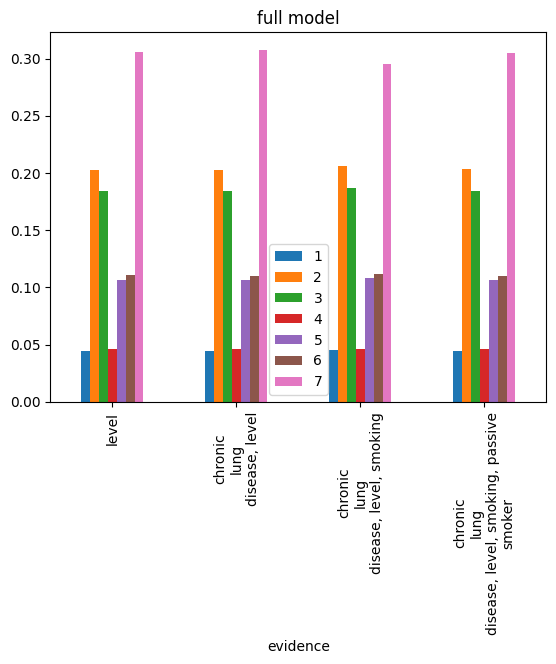

In [82]:
evidences = [{mp('level'): 2},
             {mp('chronic lung disease'): 6, mp('level'): 2},
             {mp('chronic lung disease'): 6, mp('level'): 2, mp('smoking'):1},
             {mp('chronic lung disease'): 6, mp('level'): 2, mp('smoking'):1,  mp('passive smoker'):1}
             ]
query = [mp('genetic risk')]


query_result = make_queries([full_bn_inference], ['full model'], evidences, query)
multi_bar_plot(list(query_result.values()), list(query_result.keys()), 'evidence', 1.3)


In [83]:
dfs = dict_to_dataframes(query_result)
show_details(dfs)

Evidences: level


,1,2,3,4,5,6,7
model,,,,,,,
full model,0.044558,0.202868,0.184283,0.04579,0.106529,0.110398,0.305574


Evidences: chronic lung disease, level


,1,2,3,4,5,6,7
model,,,,,,,
full model,0.044425,0.202346,0.18387,0.045659,0.106126,0.109854,0.30772


Evidences: chronic lung disease, level, smoking


,1,2,3,4,5,6,7
model,,,,,,,
full model,0.045236,0.206075,0.187227,0.046493,0.108064,0.111833,0.295072


Evidences: chronic lung disease, level, smoking, passive smoker


,1,2,3,4,5,6,7
model,,,,,,,
full model,0.04461,0.203222,0.184634,0.045849,0.106568,0.110285,0.304833


### Second query

This query performed on the "Full net" and the "Trimmed net" seeks to understand how much the presence of certain symptoms such as wheezing, shortness of breath, snoring, and wheezing can influence dust allergy.

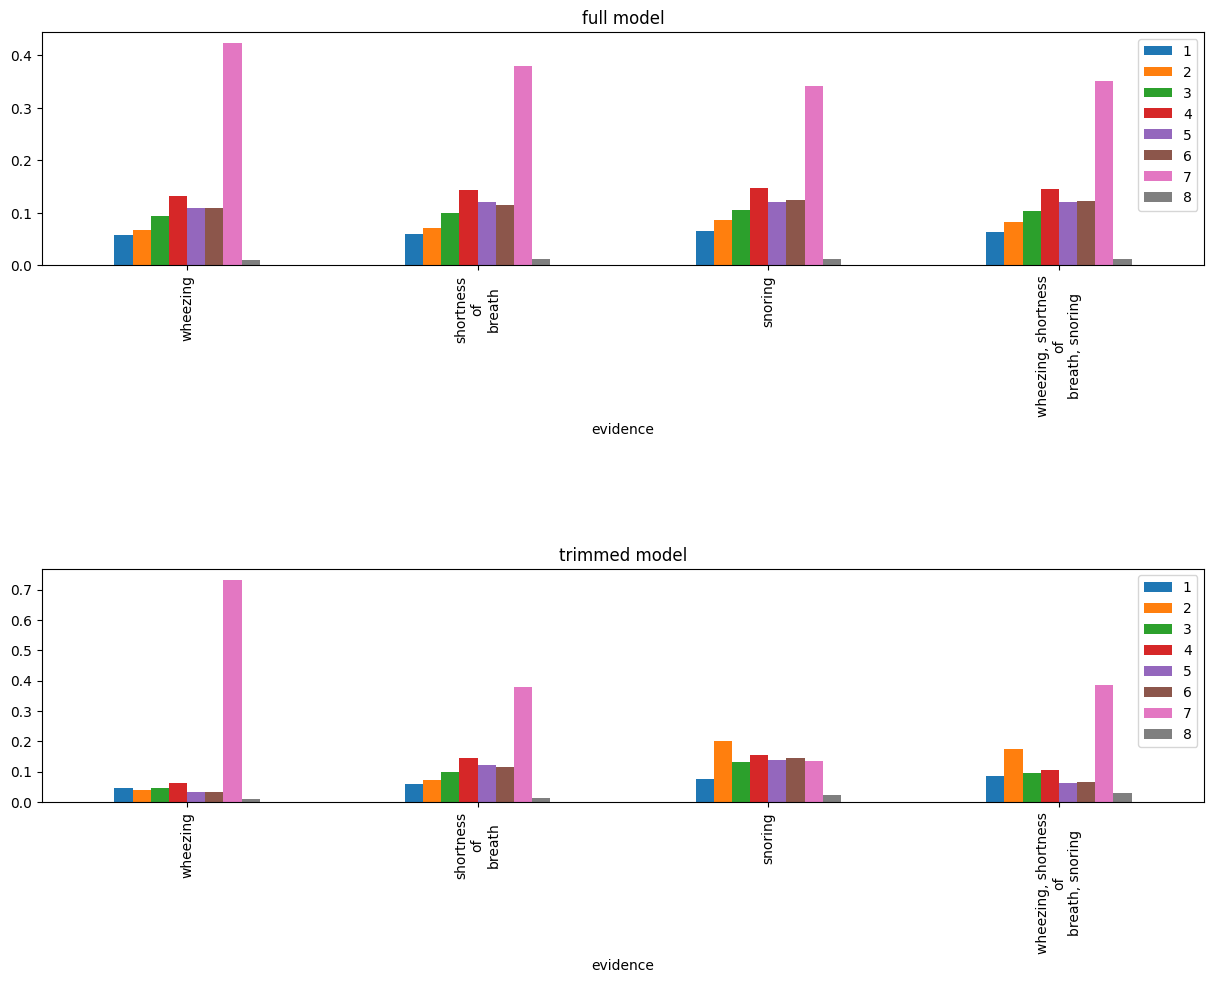

In [84]:
evidences = [{mp('wheezing'): 7},
             {mp('shortness of breath'): 7},
             {mp('snoring'): 7},
             {mp('wheezing'): 7, mp('shortness of breath'): 7, mp('snoring'): 7},
             ]
query = [mp('dust allergy')]


query_result = make_queries([full_bn_inference, trimmed_bn_inference], ['full model', 'trimmed model'], evidences, query)
multi_bar_plot(query_result.values(), query_result.keys(), 'evidence', 1.3)


In [85]:
dfs = dict_to_dataframes(query_result)
show_details(dfs)


Evidences: wheezing


,1,2,3,4,5,6,7,8
model,,,,,,,,
full model,0.056864,0.067347,0.093808,0.131505,0.108264,0.108330,0.423196,0.010686
trimmed model,0.044483,0.040299,0.046093,0.060757,0.032743,0.033533,0.732562,0.009531


Evidences: shortness of breath


,1,2,3,4,5,6,7,8
model,,,,,,,,
full model,0.060273,0.071385,0.099432,0.14304,0.120529,0.114825,0.379189,0.011327
trimmed model,0.060258,0.071374,0.099426,0.14308,0.120513,0.114810,0.379214,0.011325


Evidences: snoring


,1,2,3,4,5,6,7,8
model,,,,,,,,
full model,0.064198,0.085982,0.105556,0.146555,0.120313,0.123632,0.341046,0.012718
trimmed model,0.075367,0.199691,0.131222,0.155856,0.136823,0.145666,0.133043,0.022332


Evidences: wheezing, shortness of breath, snoring


,1,2,3,4,5,6,7,8
model,,,,,,,,
full model,0.062950,0.082068,0.104023,0.145151,0.119717,0.122442,0.350961,0.012688
trimmed model,0.086318,0.172575,0.094155,0.104018,0.061191,0.065901,0.385950,0.029892


# Performance test

In [93]:
import time
evidences = {mp('air pollution'):6, mp('passive smoker'):6, mp('smoking'):6, mp('chronic lung disease'):6, mp('occupational hazards'):6,mp('genetic risk'):6}
query = ['level']

models_to_test = [full_bn_inference, trimmed_bn_inference, auto_bn_inference]

iter = 10000
for model, name in zip(models_to_test, ["full model", "trimmed model", "auto model"]):
    start_time = time.time()
    for i in range(iter):
        model.query(
                variables=query,
                evidence=evidences,
                show_progress=False
            )
    end_time = time.time()
    elapsed_time = (end_time - start_time) / iter
    print(f"Elapsed time for {name}: ", elapsed_time, "seconds")



Elapsed time for full model:  0.012962215876579284 seconds
Elapsed time for trimmed model:  0.013736669659614563 seconds
Elapsed time for auto model:  0.00264724440574646 seconds
